In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
v_spec = np.load("ventricle_spectrum.npy")
a_spec = np.load("article_spectrum.npy")

In [8]:
# choose randomly from v_spec 
N = a_spec.shape[0]
choice = np.random.choice(v_spec.shape[0], N)
v_spec_random = v_spec[choice]
len(v_spec_random)

71

In [15]:
# create dataset and labels(v: 0, a:1)
data = np.vstack((v_spec_random,a_spec))
label = np.array([0] * N + [1] * N)

In [19]:
train_data, test_data,train_label, test_label = train_test_split(data, label)

In [26]:
scaler = StandardScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)


In [44]:
n_feature = 3
regr = LinearRegression()
regr.fit(scaled_train_data[:,: n_feature], train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
label_pred = regr.predict(scaled_test_data[:, :n_feature])

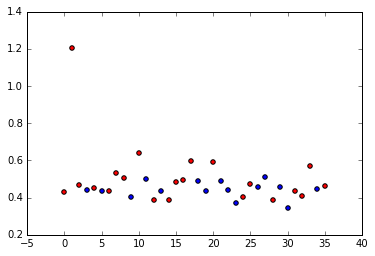

In [46]:
for i in range(len(label_pred)):
    if test_label[i] == 0:
        plt.scatter(i, label_pred[i], c="b", label="ventricle")
    if test_label[i] == 1:
        plt.scatter(i, label_pred[i], c="r", label="article")
plt.show()